In [1]:
import torch
import numpy
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train = False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD3224EE250>, 5)

In [6]:
import matplotlib.pyplot as plt

Label: 5


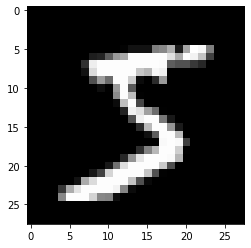

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:',label)

Label: 3


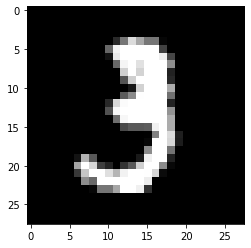

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:',label)

Label: 0


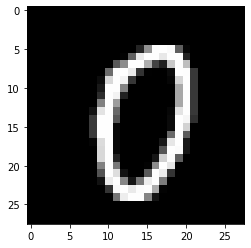

In [9]:
image, label = dataset[1000]
plt.imshow(image, cmap='gray')
print('Label:',label)

In [10]:
import torchvision.transforms as transforms

In [11]:
dataset = MNIST(root='data/', train = True, transform = transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]

In [13]:
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


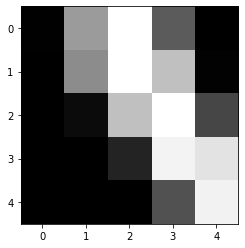

In [15]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [16]:
n = 60000
val_pct = 0.2
import numpy as np
def split_indices(n, val_pct):
  # Determine the size of validation set
  n_val = int(n*val_pct)
  # Create the random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  # Pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val]

In [17]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [18]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ',val_indices[:20])

48000 12000
Sample val indices:  [38787 58636 22866 47412 36087 56197 43813  1075 46951 48548 46408 13705
 39296 19893 28308 20794 21844  7770 47247  3644]


In [19]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [20]:
batch_size = 100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler = val_sampler)

In [21]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [22]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0008,  0.0186,  0.0242,  ...,  0.0066,  0.0179, -0.0299],
         [-0.0099, -0.0053,  0.0317,  ...,  0.0150, -0.0047,  0.0219],
         [ 0.0292,  0.0063,  0.0089,  ..., -0.0242,  0.0334, -0.0074],
         ...,
         [ 0.0313,  0.0197, -0.0241,  ...,  0.0150, -0.0246,  0.0140],
         [-0.0323, -0.0201, -0.0296,  ...,  0.0128, -0.0240, -0.0028],
         [ 0.0274, -0.0138,  0.0112,  ...,  0.0027,  0.0314,  0.0108]],
        requires_grad=True), Parameter containing:
 tensor([-0.0242, -0.0010, -0.0154, -0.0056, -0.0257,  0.0010, -0.0002,  0.0138,
          0.0335,  0.0167], requires_grad=True)]

In [24]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  break

tensor([3, 2, 6, 8, 4, 1, 5, 5, 2, 8, 1, 8, 3, 6, 1, 3, 9, 1, 8, 0, 2, 2, 2, 0,
        2, 6, 7, 1, 7, 0, 5, 5, 2, 4, 4, 2, 6, 0, 1, 3, 7, 1, 7, 0, 2, 7, 2, 3,
        5, 7, 0, 1, 6, 8, 5, 8, 6, 5, 1, 0, 2, 8, 9, 6, 5, 4, 6, 1, 7, 4, 5, 5,
        9, 2, 3, 1, 4, 7, 4, 4, 9, 7, 5, 5, 9, 1, 1, 3, 8, 5, 2, 4, 0, 2, 6, 3,
        2, 3, 8, 6])
torch.Size([100, 1, 28, 28])


In [25]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0276,  0.0236,  0.0235,  ..., -0.0119, -0.0333, -0.0056],
         [ 0.0030, -0.0224, -0.0321,  ...,  0.0266,  0.0238, -0.0291],
         [ 0.0267,  0.0344, -0.0170,  ...,  0.0300, -0.0335, -0.0191],
         ...,
         [ 0.0031, -0.0254, -0.0309,  ..., -0.0312, -0.0304,  0.0008],
         [ 0.0270, -0.0172, -0.0160,  ..., -0.0085,  0.0345, -0.0199],
         [-0.0125, -0.0121, -0.0073,  ...,  0.0201, -0.0144,  0.0108]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0235, -0.0298, -0.0145,  0.0320,  0.0350, -0.0126,  0.0063, -0.0291,
          0.0121,  0.0275], requires_grad=True)]

In [27]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [28]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([1, 6, 4, 7, 0, 8, 1, 5, 7, 9, 9, 3, 9, 6, 8, 9, 0, 5, 7, 7, 7, 6, 7, 6,
        7, 7, 6, 2, 5, 2, 7, 3, 6, 5, 8, 8, 2, 8, 9, 1, 0, 3, 0, 6, 4, 4, 5, 0,
        0, 5, 5, 4, 0, 1, 3, 1, 2, 5, 9, 4, 5, 1, 4, 6, 9, 1, 1, 5, 4, 2, 1, 2,
        7, 3, 4, 9, 7, 7, 8, 7, 6, 1, 5, 9, 7, 0, 9, 9, 7, 9, 4, 2, 4, 4, 5, 2,
        8, 5, 8, 7])
torch.Size([100, 1, 28, 28])


In [29]:
print(outputs.shape)

torch.Size([100, 10])


In [30]:
import torch.nn.functional as F

probs = F.softmax(outputs, dim=1)
# Look at sample probabilities
print('Sample probabilities: \n', probs[:2].data)
# Add up the sample probabilties of an output row
print('Sum: ',torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.1232, 0.1087, 0.0936, 0.0961, 0.1106, 0.1082, 0.0922, 0.0865, 0.0797,
         0.1012],
        [0.1005, 0.1213, 0.1019, 0.0926, 0.0824, 0.0918, 0.1002, 0.0763, 0.0892,
         0.1439]])
Sum:  1.0000001192092896


In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1232, 0.1439, 0.1201, 0.1229, 0.1496, 0.1315, 0.1216, 0.1354, 0.1375,
        0.1450, 0.1281, 0.1164, 0.1335, 0.1226, 0.1288, 0.1278, 0.1315, 0.1215,
        0.1113, 0.1151, 0.1473, 0.1386, 0.1272, 0.1441, 0.1411, 0.1237, 0.1288,
        0.1230, 0.1174, 0.1291, 0.1254, 0.1294, 0.1188, 0.1568, 0.1281, 0.1513,
        0.1765, 0.1217, 0.1354, 0.1191, 0.1174, 0.1280, 0.1388, 0.1268, 0.1296,
        0.1276, 0.1213, 0.1392, 0.1476, 0.1214, 0.1214, 0.1216, 0.1186, 0.1180,
        0.1367, 0.1166, 0.1342, 0.1409, 0.1258, 0.1205, 0.1217, 0.1203, 0.1143,
        0.1298, 0.1181, 0.1118, 0.1158, 0.1348, 0.1188, 0.1303, 0.1140, 0.1347,
        0.1147, 0.1242, 0.1338, 0.1362, 0.1223, 0.1532, 0.1265, 0.1403, 0.1290,
        0.1368, 0.1145, 0.1159, 0.1259, 0.1186, 0.1162, 0.1557, 0.1303, 0.1356,
        0.1389, 0.1281, 0.1265, 0.1318, 0.1343, 0.1438, 0.1434, 0.1207, 0.1198,
        0.1372], grad_fn=<MaxBackward0>)
tensor([0, 9, 8, 8, 8, 9, 8, 9, 5, 8, 5, 4, 5, 9, 4, 8, 3, 2, 6, 0, 8, 1, 5, 0,

In [32]:
labels

tensor([1, 6, 4, 7, 0, 8, 1, 5, 7, 9, 9, 3, 9, 6, 8, 9, 0, 5, 7, 7, 7, 6, 7, 6,
        7, 7, 6, 2, 5, 2, 7, 3, 6, 5, 8, 8, 2, 8, 9, 1, 0, 3, 0, 6, 4, 4, 5, 0,
        0, 5, 5, 4, 0, 1, 3, 1, 2, 5, 9, 4, 5, 1, 4, 6, 9, 1, 1, 5, 4, 2, 1, 2,
        7, 3, 4, 9, 7, 7, 8, 7, 6, 1, 5, 9, 7, 0, 9, 9, 7, 9, 4, 2, 4, 4, 5, 2,
        8, 5, 8, 7])

In [33]:
def accuracy(l1,l2):
  return torch.sum(l1 == l2).item()/ len(l1)

In [34]:
accuracy(preds,labels)

0.04

In [35]:
loss_fn = F.cross_entropy

In [36]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)

In [37]:
loss

tensor(2.3521, grad_fn=<NllLossBackward0>)

In [38]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [39]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  # Calculate loss
  preds = model(xb)
  loss = loss_func(preds, yb)
  if opt is not None:
    # Compute gradients
    loss.backward()
    # Updating the gradients
    opt.step()
    # Reset the gradients
    opt.zero_grad()
  metric_result = None
  if metric is not None:
    # Compute metric
    metric_result = metric(preds, yb)
  return loss.item(), len(xb), metric_result

In [40]:
def evaluate(model, loss_func, valid_dl, metric = None):
  with torch.no_grad():
    # Pass each batch through the model
    results = [loss_batch(model, loss_func,xb, yb, metric = metric)
    for xb,yb in valid_dl]
    # Seperate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    # Total size of the dataset
    total = np.sum(nums)
    # Avg loss across batches
    avg_loss = np.sum(np.multiply(losses, nums))/ total
    avg_metric  = None
    if metric is not None:
      # Avg of metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total
  return avg_loss, total, avg_metric

In [41]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [42]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3206, Accuracy: 0.1052


In [47]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
  for epoch in range(epochs):
    # Training
    for xb,yb in train_dl:
      loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

    # Evaluation
    result = evaluate(model, loss_fn, valid_dl,metric)
    val_loss, total, val_metric = result

    # Print progress
    if metric is None:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__,val_metric))

In [48]:
# Redefine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
fit(5,model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8711, accuracy: 0.6696
Epoch [2/5], Loss: 1.5726, accuracy: 0.7488
Epoch [3/5], Loss: 1.3628, accuracy: 0.7792
Epoch [4/5], Loss: 1.2120, accuracy: 0.7974
Epoch [5/5], Loss: 1.1001, accuracy: 0.8087


In [50]:
fit(5,model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0146, accuracy: 0.8164
Epoch [2/5], Loss: 0.9472, accuracy: 0.8220
Epoch [3/5], Loss: 0.8929, accuracy: 0.8267
Epoch [4/5], Loss: 0.8481, accuracy: 0.8304
Epoch [5/5], Loss: 0.8106, accuracy: 0.8336


In [51]:
fit(5,model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7786, accuracy: 0.8377
Epoch [2/5], Loss: 0.7511, accuracy: 0.8410
Epoch [3/5], Loss: 0.7270, accuracy: 0.8444
Epoch [4/5], Loss: 0.7059, accuracy: 0.8463
Epoch [5/5], Loss: 0.6870, accuracy: 0.8484


In [52]:
fit(5,model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6702, accuracy: 0.8502
Epoch [2/5], Loss: 0.6550, accuracy: 0.8522
Epoch [3/5], Loss: 0.6412, accuracy: 0.8536
Epoch [4/5], Loss: 0.6287, accuracy: 0.8545
Epoch [5/5], Loss: 0.6172, accuracy: 0.8568


In [53]:
fit(5,model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6066, accuracy: 0.8584
Epoch [2/5], Loss: 0.5968, accuracy: 0.8595
Epoch [3/5], Loss: 0.5877, accuracy: 0.8608
Epoch [4/5], Loss: 0.5794, accuracy: 0.8613
Epoch [5/5], Loss: 0.5715, accuracy: 0.8622


In [54]:
# Testing with individual images

In [63]:
test_dataset = MNIST(root='data/', train = False, transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


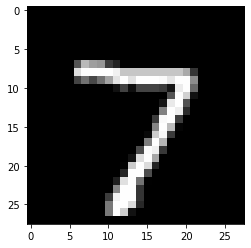

In [67]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap= 'gray')
print('Shape:', img.shape)
print('Label:',label)

In [68]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

In [69]:
predict_image(img,model)

7